# Введение в ML

## Домашнее задание №1

**Выполнил: Борисочкин Михаил, группа ML-12**

### Задание

**Для каждой из задач**:

1. Написать на Python + NumPy несколько вариантов кода различной эффективности. Должно быть не менее трёх вариантов, в том числе как минимум один полностью векторизованный вариант (без циклов), и один вариант без векторизации (с циклами). Третий вариант решения — на ваше усмотрение, например, это может быть наиболее хорошо читаемый способ решения, или частично векторизованный вариант. Все пункты выполнять в одном google collab, разделяя их пунктами 1., 1.1, 1.2, 1.3; 2., 2.1, 2.2, 2.3; и тд.

2. Сравнить в IPython Notebook при помощи %timeit скорость работы на нескольких тестовых наборах РАЗНОГО размера (минимум 3, причём отличаться размеры входных данных должны минимум на порядок. Например, массивы длины 100, 1000, 10000).

3. Проанализировать полученные данные о скорости работы разных реализаций.

4. Получить выводы.

### Импорт библиотек

In [1]:
from urllib.request import urlopen
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

### Методика сравнения времени работы

Для расчёта времени исполнения написанных функций будет использоваться магическая команда %timeit с флагом -o для сохранения её вывода. Данный вывод будет сохраняться для каждого из трёх тестовых наборов в список time, в соответствующую ячейку. После с помощью функции fill_time значения в списке time будут переноситься в словарь compute_times по соответствущему ключу. Словарь compute_times будет использоваться для построения графика в конце каждой задачи для последующего сравнения времён.

In [84]:
# Словарь для хранения среднего времени исполнения функции для каждого из вариантов
compute_times = {"for-loop": [0, 0, 0],
                 "Промежуточное решение": [0, 0, 0],
                 "numpy": [0, 0, 0]}

# Переменная для хранения времён из timeit
time = [0, 0, 0]

In [85]:
def fill_time(section_name, time_list):
    """
    Функция для заполнения словаря с временами
    :param section_name: Название ключа
    :param time_list: Список с временами
    """
    for i in range(len(time_list)):
        compute_times[section_name][i] = np.mean(time_list[i].timings) 

Ниже представлена функция для вывода графика времён. В подписях по оси X также будет указан размер входных данных для каждого случая

In [86]:
def plot_time_bars(times_dict, x_labels):
    """
    Функция для вывода столбчатой гистограммы с временами
    :param times_dict: Словарь со средними временами
    :param x_labels: Метки по X
    """
    data_to_plot = pd.DataFrame(times_dict)
    data_to_plot_melt = data_to_plot.melt(var_name="Тип", value_name="Время, c")
    data_to_plot_melt["Время, мкc"] = data_to_plot_melt["Время, c"]*1e6
    sns.barplot(data=data_to_plot_melt, x=x_labels*3, y="Время, мкc", hue="Тип")
    plt.show()

### Задачи

#### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.

Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [290]:
# Входные данные для проверки времени работы вариантов кода
X1 = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4,4,4]]) # Матрица из примера 

X2 = np.eye(10, 20, dtype=int) # Матрица 10 на 20 с ненулевой диагональю (только первый элемент диагонали равен нулю)
X2[0][0] = 0
X2[1][1] = -3
X2[2][2] = 5
X2[9][9] = 7

np.random.seed(7)
X3 = np.random.randint(0, 5, size=(30, 50)) # Матрица 60 на 50 из случайных чисел от 0 до 100

##### 1.1. for-loop

In [291]:
def diag_prod_loop (matrix):
    """
    Функция для расчёта произведения ненулевых элементов на диагонали матрицы
    :param matrix: Матрица
    :return: Произведение ненулевых элементов на диагонали матрицы
    """
    prod = 1
    for i in range(min(matrix.shape)):
        if matrix[i, i] != 0:
            prod *= matrix[i, i]
    return prod

In [266]:
# Выполнение функции для X1
diag_prod_loop(X1)

3

In [293]:
# Вычисление среднего времени выполнения для X1 и запись значения в список time
time[0] = %timeit -o diag_prod_loop(X1)

858 ns ± 17.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [294]:
# Выполнение функции для X2
diag_prod_loop(X2)

-105

In [295]:
# Вычисление среднего времени выполнения для X2 и запись значения в список time
time[1] = %timeit -o diag_prod_loop(X2)

2.36 µs ± 232 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [296]:
# Выполнение функции для X3
diag_prod_loop(X3)

4718592

In [297]:
# Вычисление среднего времени выполнения для X3 и запись значения в список time
time[2] = %timeit -o diag_prod_loop(X3)

5.54 µs ± 70.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [298]:
# Заполнение словаря compute_time для случая for-loop
fill_time("for-loop", time)

{'for-loop': [8.577134857187048e-07,
  2.3636784284774746e-06,
  5.538117714375922e-06],
 'Промежуточное решение': [4.007844571439948e-06,
  5.809458428578053e-06,
  9.614913714218087e-06],
 'numpy': [3.6338385715082817e-06,
  3.811305857130459e-06,
  3.658124714191737e-06]}

##### 1.2. Промежуточное решение

In [342]:
def diag_prod_intermediate (matrix):
    """
    Функция для расчёта произведения ненулевых элементов на диагонали матрицы (промежуточный вариант)
    :param matrix: Матрица
    :return: Произведение ненулевых элементов на диагонали матрицы
    """
    diag_elements = [matrix[i, i] for i in range(min(matrix.shape)) if matrix[i, i] != 0]
    return np.prod(diag_elements)

In [343]:
# Выполнение функции для X1
diag_prod_intermediate(X1)

3

In [344]:
# Вычисление среднего времени выполнения для X1 и запись значения в список time
time[0] = %timeit -o diag_prod_intermediate(X1)

3.94 µs ± 33.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [345]:
# Выполнение функции для X2
diag_prod_intermediate(X2)

-105

In [346]:
# Вычисление среднего времени выполнения для X2 и запись значения в список time
time[1] = %timeit -o diag_prod_intermediate(X2)

5.81 µs ± 318 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [347]:
# Выполнение функции для X3
diag_prod_intermediate(X3)

4718592

In [348]:
# Вычисление среднего времени выполнения для X3 и запись значения в список time
time[2] = %timeit -o diag_prod_intermediate(X3)

9.05 µs ± 43.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [349]:
# Заполнение словаря compute_time для случая промежуточного решения
fill_time("Промежуточное решение", time)

{'for-loop': [8.577134857187048e-07,
  2.3636784284774746e-06,
  5.538117714375922e-06],
 'Промежуточное решение': [3.936315714215328e-06,
  5.807308000013499e-06,
  9.048077285905103e-06],
 'numpy': [4.923495428603409e-06, 4.83678171419472e-06, 4.952755428634451e-06]}

##### 1.3. Numpy

In [350]:
def diag_prod_numpy (matrix):
    """
    Функция для расчёта произведения ненулевых элементов на диагонали матрицы  через numpy
    :param matrix: Матрица
    :return: Произведение ненулевых элементов на диагонали матрицы
    """
    diag_elements = np.diag(matrix)
    return np.prod(diag_elements[diag_elements != 0])

In [351]:
# Выполнение функции для X1
diag_prod_numpy(X1)

3

In [352]:
# Вычисление среднего времени выполнения для X1 и запись значения в список time
time[0] = %timeit -o diag_prod_numpy(X1)

3.63 µs ± 17.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [353]:
# Выполнение функции для X2
diag_prod_numpy(X2)

-105

In [354]:
# Вычисление среднего времени выполнения для X2 и запись значения в список time
time[1] = %timeit -o diag_prod_numpy(X2)

3.61 µs ± 25.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [355]:
# Выполнение функции для X3
diag_prod_numpy(X3)

4718592

In [356]:
# Вычисление среднего времени выполнения для X3 и запись значения в список time
time[2] = %timeit -o diag_prod_numpy(X3)

3.68 µs ± 23.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [357]:
# Заполнение словаря compute_time для случая векторизованного решения
fill_time("numpy", time)
compute_times

{'for-loop': [8.577134857187048e-07,
  2.3636784284774746e-06,
  5.538117714375922e-06],
 'Промежуточное решение': [3.936315714215328e-06,
  5.807308000013499e-06,
  9.048077285905103e-06],
 'numpy': [3.626802285767293e-06,
  3.608804428534183e-06,
  3.6806067144165615e-06]}

##### Итог по задаче 1

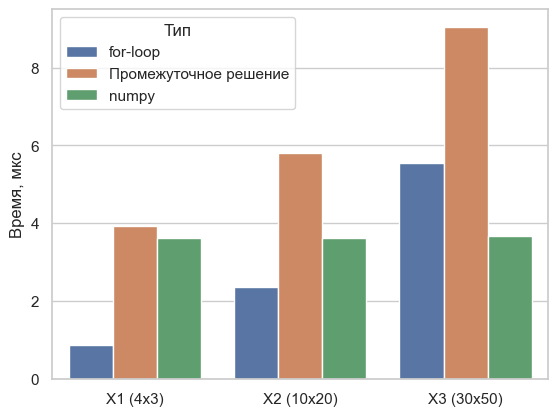

In [358]:
# Столбчатая диаграмма с временами работы разных вариантов кода
plot_time_bars(compute_times, ["X1 (4x3)", "X2 (10x20)", "X3 (30x50)"])

Из графика выше видно, что с возрастанием размера матрицы, растёт и время её обработки для всех реализаций, кроме векторизованной (numpy). Реализация с помощью numpy всегда исполняется за примерно одно и то же время, хотя и проигрывает по времени функции на цикле for в первых двух случаях.

#### 2. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.

Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [402]:
# Входные данные
# x и y из примера 
x1 = np.array([1, 2, 2, 4])
y1 = np.array([4, 2, 1, 2])

# Диапазоны от 1 до 100 включительно для x и не включительно для y
x2 = np.arange(1, 101)
y2 = np.arange(1, 101)
y2[99] = 99

# Массивы из 1, 2, 3 размером 1000
np.random.seed(7)
x3 = np.random.randint(1, 3, 1000)
y3 = np.random.randint(1, 3, 1000)

##### 2.1. for-loop

In [428]:
def check_same_multiset_loop(x, y):
    """
    Функция проверки задания одинакового мультимножества с помощью цикла for
    :param x: Вектор x
    :param y: Вектор y
    :return: True, если векторы задают одно и то же мультимножество, иначе False
    """
    for i, j in zip(sorted(x), sorted(y)):
        if i != j:
            return False
    return True

In [429]:
# Выполнение функции для x1 и y1
check_same_multiset_loop(x1, y1)

True

In [430]:
# Вычисление среднего времени выполнения для x1 и y1 и запись значения в список time
time[0] = %timeit -o check_same_multiset_loop(x1, y1)

1.49 µs ± 60.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [431]:
# Выполнение функции для x2 и y2
check_same_multiset_loop(x2, y2)

False

In [432]:
# Вычисление среднего времени выполнения для x2 и y2 и запись значения в список time
time[1] = %timeit -o check_same_multiset_loop(x2, y2)

11.1 µs ± 252 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [433]:
# Выполнение функции для x2 и y2
check_same_multiset_loop(x3, y3)

False

In [434]:
# Вычисление среднего времени выполнения для x3 и y3 и запись значения в список time
time[2] = %timeit -o check_same_multiset_loop(x3, y3)

179 µs ± 3.65 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [435]:
# Заполнение словаря compute_time для случая for-loop
fill_time("for-loop", time)

##### 2.2. Промежуточный вариант

In [436]:
def check_same_multiset_intermediate(x, y):
    """
    Функция проверки задания одинакового мультимножества (промежуточный вариант)
    :param x: Вектор x
    :param y: Вектор y
    :return: True, если векторы задают одно и то же мультимножество, иначе False
    """
    return sorted(x) == sorted(y)

In [437]:
# Выполнение функции для x1 и y1
check_same_multiset_intermediate(x1, y1)

True

In [438]:
# Вычисление среднего времени выполнения для x1 и y1 и запись значения в список time
time[0] = %timeit -o check_same_multiset_intermediate(x1, y1)

1.25 µs ± 54 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [439]:
# Выполнение функции для x2 и y2
check_same_multiset_intermediate(x2, y2)

False

In [440]:
# Вычисление среднего времени выполнения для x2 и y2 и запись значения в список time
time[1] = %timeit -o check_same_multiset_intermediate(x2, y2)

8.48 µs ± 46 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [441]:
# Выполнение функции для x3 и y3
check_same_multiset_intermediate(x3, y3)

False

In [442]:
# Вычисление среднего времени выполнения для x3 и y3 и запись значения в список time
time[2] = %timeit -o check_same_multiset_intermediate(x3, y3)

161 µs ± 1.51 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [443]:
# Заполнение словаря compute_time для случая промежуточного решения
fill_time("Промежуточное решение", time)

##### 2.3. Numpy

In [444]:
def check_same_multiset_numpy(x, y):
    """
    Функция проверки задания одинакового мультимножества с помощью numpy
    :param x: Вектор x
    :param y: Вектор y
    :return: True, если векторы задают одно и то же мультимножество, иначе False
    """
    return np.array_equal(np.sort(x), np.sort(y))

In [445]:
# Выполнение функции для x1 и y1
check_same_multiset_numpy(x1, y1)

True

In [446]:
# Вычисление среднего времени выполнения для x1 и y1 и запись значения в список time
time[0] = %timeit -o check_same_multiset_numpy(x1, y1)

3.16 µs ± 196 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [447]:
# Выполнение функции для x2 и y2
check_same_multiset_numpy(x2, y2)

False

In [448]:
# Вычисление среднего времени выполнения для x2 и y2 и запись значения в список time
time[1] = %timeit -o check_same_multiset_numpy(x2, y2)

3.51 µs ± 322 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [449]:
# Выполнение функции для x3 и y3
check_same_multiset_numpy(x3, y3)

False

In [450]:
# Вычисление среднего времени выполнения для x3 и y3 и запись значения в список time
time[2] = %timeit -o check_same_multiset_numpy(x3, y3)

9.86 µs ± 600 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [451]:
# Заполнение словаря compute_time для случая векторизованного решения
fill_time("numpy", time)
compute_times

{'for-loop': [1.4897537571461206e-06,
  1.1093961142884965e-05,
  0.000178567057143664],
 'Промежуточное решение': [1.2493877142800818e-06,
  8.477791999965641e-06,
  0.0001611909728572105],
 'numpy': [3.160085285697798e-06,
  3.5141012855871974e-06,
  9.858782571391203e-06]}

##### Итог по задаче 2

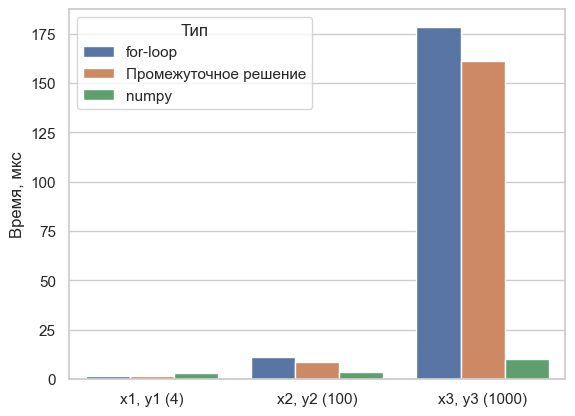

In [452]:
# Столбчатая диаграмма с временами работы разных вариантов кода
plot_time_bars(compute_times, ["x1, y1 (4)", "x2, y2 (100)", "x3, y3 (1000)"])

Из графика видно огромное преимущество векторизованного метода при большом размере входных массивов (от 100 элементов). Однако данный метод проигрывает по скорости примерно в 2 раза при малом размере входных параметров.

#### 3. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [454]:
# Входные данные
# Из примера
x1 = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

# Массив размера 100 с тремя нулевыми значениями
x2 = np.arange(0, 101)
x2[5] = x2[15] = x2[55] = 0

# Массив размера 1000 с нулевыми значениями
x3 = np.arange(0, 1001)
x3[100:150] = x3[600:625] = x3 [699] = 0

##### 3.1. for-loop

In [493]:
def max_after_zero_loop(x):
    """
    Функция для поиска максимального значения в векторе среди элементов, перед которыми стоит нулевой, с помощью цикла for
    :param x: Вектор x
    :return: Значение максимального элемента
    """
    max_value = None
    for i in range(1, len(x)):
        if x[i - 1] == 0:
            if max_value is None or max_value < x[i]:
                max_value = x[i]
    
    return max_value
            

In [494]:
# Выполнение функции для x1
max_after_zero_loop(x1)

5

In [495]:
# Вычисление среднего времени выполнения для x1 и запись значения в список time
time[0] = %timeit -o max_after_zero_loop(x1)

1.07 µs ± 63.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [496]:
# Выполнение функции для x2
max_after_zero_loop(x2)

56

In [497]:
# Вычисление среднего времени выполнения для x2 и запись значения в список time
time[1] = %timeit -o max_after_zero_loop(x2)

7.88 µs ± 36.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [498]:
# Выполнение функции для x3
max_after_zero_loop(x3)

700

In [499]:
# Вычисление среднего времени выполнения для x3 и запись значения в список time
time[2] = %timeit -o max_after_zero_loop(x3)

90.3 µs ± 2.67 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [500]:
# Заполнение словаря compute_time для случая for-loop
fill_time("for-loop", time)

##### 3.2. Промежуточное значение

In [501]:
def max_after_zero_intermediate(x):
    """
    Функция для поиска максимального значения в векторе среди элементов, перед которыми стоит нулевой (промежуточный вариант)
    :param x: Вектор x
    :return: Значение максимального элемента
    """
    values_after_zeros = [x[i] for i in range(1, len(x)) if x[i - 1] == 0]
    return max(values_after_zeros)

In [502]:
# Выполнение функции для x1
max_after_zero_intermediate(x1)

5

In [503]:
# Вычисление среднего времени выполнения для x1 и запись значения в список time
time[0] = %timeit -o max_after_zero_intermediate(x1)

1.27 µs ± 79.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [504]:
# Выполнение функции для x2
max_after_zero_intermediate(x2)

56

In [505]:
# Вычисление среднего времени выполнения для x2 и запись значения в список time
time[1] = %timeit -o max_after_zero_intermediate(x2)

8.01 µs ± 149 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [506]:
# Выполнение функции для x3
max_after_zero_intermediate(x3)

700

In [507]:
# Вычисление среднего времени выполнения для x3 и запись значения в список time
time[2] = %timeit -o max_after_zero_intermediate(x3)

88.2 µs ± 930 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [508]:
# Заполнение словаря compute_time для случая промежуточного решения
fill_time("Промежуточное решение", time)

##### 3.3. Numpy

In [509]:
def max_after_zero_numpy(x):
    """
    Функция для поиска максимального значения в векторе среди элементов, перед которыми стоит нулевой, с помощью numpy
    :param x: Вектор x
    :return: Значение максимального элемента
    """
    return x[(np.where(x == 0)[0] + 1)[:-1]].max() if x[-1] == 0 else x[(np.where(x == 0)[0] + 1)].max()

In [510]:
# Выполнение функции для x1
max_after_zero_numpy(x1)

5

In [511]:
# Вычисление среднего времени выполнения для x1 и запись значения в список time
time[0] = %timeit -o max_after_zero_numpy(x1)

3.46 µs ± 262 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [512]:
# Выполнение функции для x2
max_after_zero_numpy(x2)

56

In [513]:
# Вычисление среднего времени выполнения для x2 и запись значения в список time
time[1] = %timeit -o max_after_zero_numpy(x2)

3.03 µs ± 50.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [514]:
# Выполнение функции для x3
max_after_zero_numpy(x3)

700

In [515]:
# Вычисление среднего времени выполнения для x3 и запись значения в список time
time[2] = %timeit -o max_after_zero_numpy(x3)

3.5 µs ± 29.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [516]:
# Заполнение словаря compute_time для случая векторизованного решения
fill_time("numpy", time)
compute_times

{'for-loop': [1.0681125428693901e-06,
  7.87985314290771e-06,
  9.025225999981297e-05],
 'Промежуточное решение': [1.2659092428678247e-06,
  8.009746000004401e-06,
  8.818715857092424e-05],
 'numpy': [3.460308571395996e-06,
  3.028859142796136e-06,
  3.498467000234606e-06]}

##### Итог по задаче 3

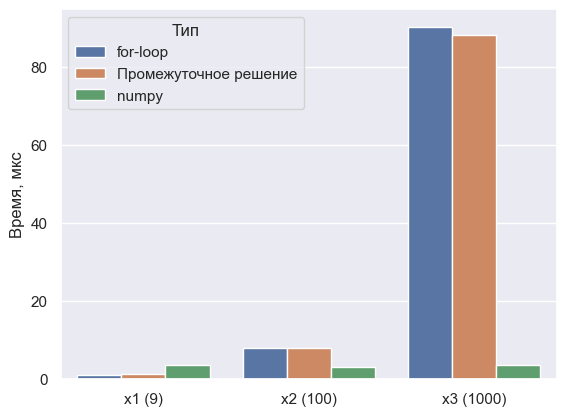

In [517]:
# Столбчатая диаграмма с временами работы разных вариантов кода
plot_time_bars(compute_times, ["x1 (9)", "x2 (100)", "x3 (1000)"])

В данном случае векторизованный вариант демонстрирует колоссальный разрыв со своими аналогами, уступая им в 3-3,5 раза только на самом малом размере входного вектора

#### 4. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

In [68]:
# Входные данные
# Изображение банана с разрешением 256 на 256 в формате jpeg 
banana_small_image = np.array(Image.open(urlopen("https://themashedbanana.files.wordpress.com/2016/04/banana.jpg")))

# Изображение граната размером 1200 на 1600 в формате jpeg
pomegranate_medium_image = np.array(Image.open(urlopen("https://upload.wikimedia.org/wikipedia/commons/5/5d/Pomegranate.jpg")))

# Изображение гор с разрешением 2306 на 3072 в формате jpeg
mountain_big_image = np.array(Image.open(urlopen("https://i.natgeofe.com/n/c9107b46-78b1-4394-988d-53927646c72b/1095_4x3.jpg")))

# Вектор для перевода RGB изображения в ЧБ
rgb_to_bw = np.array([0.299, 0.587, 0.114])

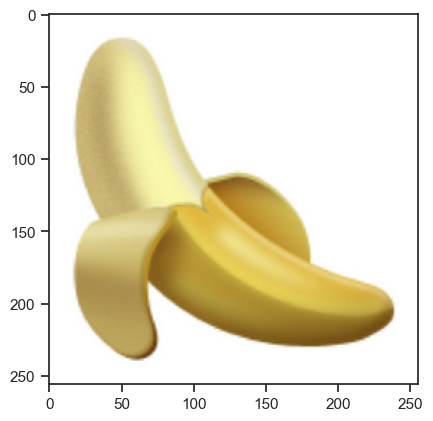

In [53]:
# Отображение маленькой картинки
with sns.axes_style("ticks"):
    plt.imshow(banana_small_image)

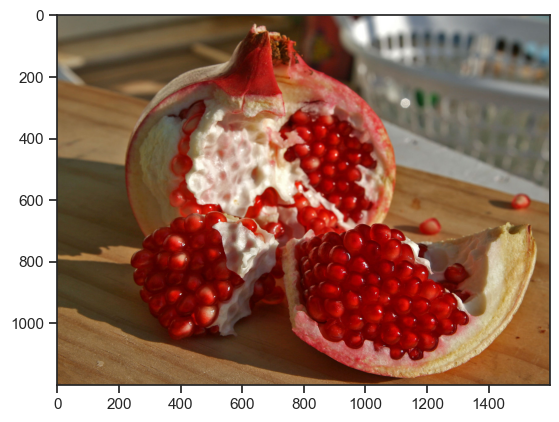

In [54]:
# Отображение средней картинки
with sns.axes_style("ticks"):
    plt.imshow(pomegranate_medium_image)

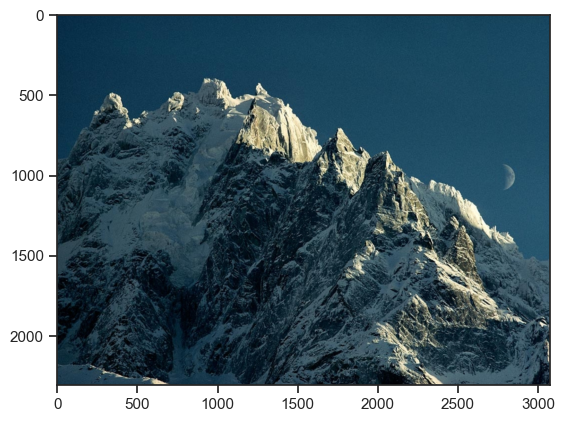

In [69]:
# Отображение большой картинки
with sns.axes_style("ticks"):
    plt.imshow(mountain_big_image)

##### 4.1. for-loop

In [56]:
def rgb_to_bw_loop(image, bw_filter):
    """
    Функция для преобразования изображения из цветного в ЧБ с помощью цикла for 
    :param image: Исходное изображение
    :param bw_filter: Фильтр для преобразования
    :return: ЧБ изображение
    """
    bw_image = np.zeros_like(image, shape=image.shape[:2])
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                bw_image[i, j] += image[i, j, k] * bw_filter[k]
                
    return bw_image

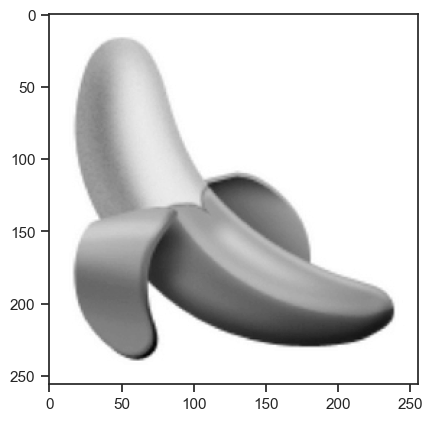

In [82]:
# Применение функции для маленького изображения и вывод результата
with sns.axes_style("ticks"):
    plt.imshow(rgb_to_bw_loop(banana_small_image, rgb_to_bw), cmap='gray')

In [87]:
# Вычисление среднего времени выполнения для маленького изображения и запись значения в список time
time[0] = %timeit -o rgb_to_bw_loop(banana_small_image, rgb_to_bw)

116 ms ± 7.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


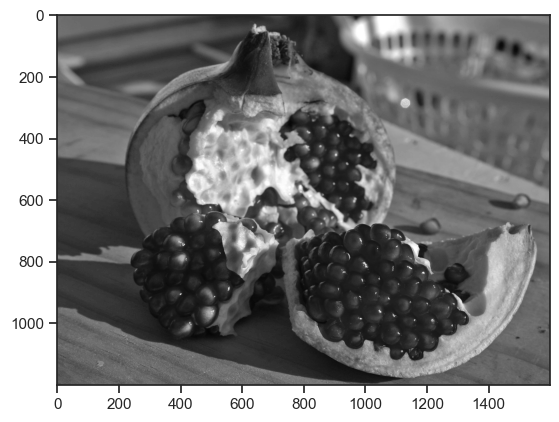

In [88]:
# Применение функции для среднего изображения и вывод результата
with sns.axes_style("ticks"):
    plt.imshow(rgb_to_bw_loop(pomegranate_medium_image, rgb_to_bw), cmap='gray')

In [89]:
# Вычисление среднего времени выполнения для большого изображения и запись значения в список time
time[1] = %timeit -o rgb_to_bw_loop(pomegranate_medium_image, rgb_to_bw)

3.15 s ± 30.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


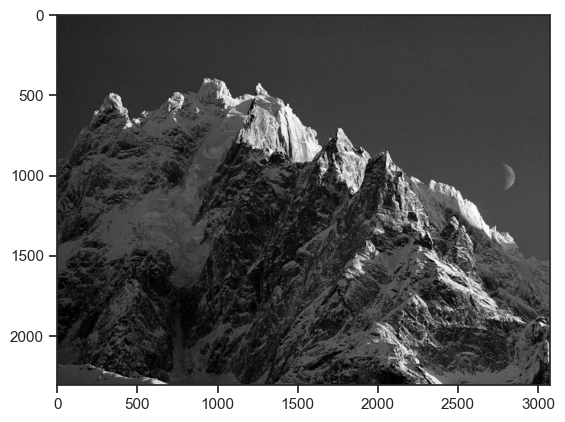

In [90]:
# Применение функции для большого изображения и вывод результата
with sns.axes_style("ticks"):
    plt.imshow(rgb_to_bw_loop(mountain_big_image, rgb_to_bw), cmap='gray')

In [91]:
# Вычисление среднего времени выполнения для среднего изображения и запись значения в список time
time[2] = %timeit -o rgb_to_bw_loop(mountain_big_image, rgb_to_bw)

11.4 s ± 507 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [92]:
# Заполнение словаря compute_time для случая for-loop
fill_time("for-loop", time)

##### 4.2. Промежуточный вариант

In [93]:
def rgb_to_bw_intermediate(image, bw_filter):
    """
    Функция для преобразования изображения из цветного в ЧБ (промежуточный вариант)
    :param image: Исходное изображение
    :param bw_filter: Фильтр для преобразования
    :return: ЧБ изображение
    """
    bw_image = np.zeros_like(image, shape=image.shape[:2], dtype=float)
    
    for k in range(image.shape[2]):
        bw_image += image[:, :, k] * bw_filter[k]
    return bw_image

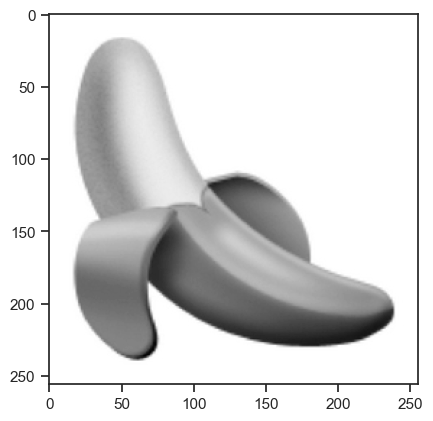

In [94]:
# Применение функции для маленького изображения и вывод результата
with sns.axes_style("ticks"):
    plt.imshow(rgb_to_bw_intermediate(banana_small_image, rgb_to_bw), cmap='gray')

In [95]:
# Вычисление среднего времени выполнения для маленького изображения и запись значения в список time
time[0] = %timeit -o rgb_to_bw_intermediate(banana_small_image, rgb_to_bw)

198 µs ± 6.66 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


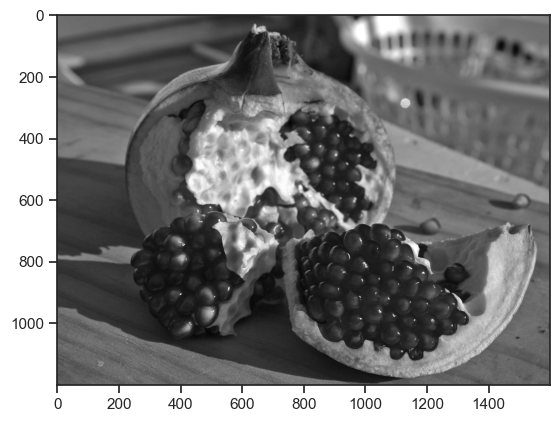

In [96]:
# Применение функции для среднего изображения и вывод результата
with sns.axes_style("ticks"):
    plt.imshow(rgb_to_bw_intermediate(pomegranate_medium_image, rgb_to_bw), cmap='gray')

In [97]:
# Вычисление среднего времени выполнения для большого изображения и запись значения в список time
time[1] = %timeit -o rgb_to_bw_intermediate(pomegranate_medium_image, rgb_to_bw)

19.2 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


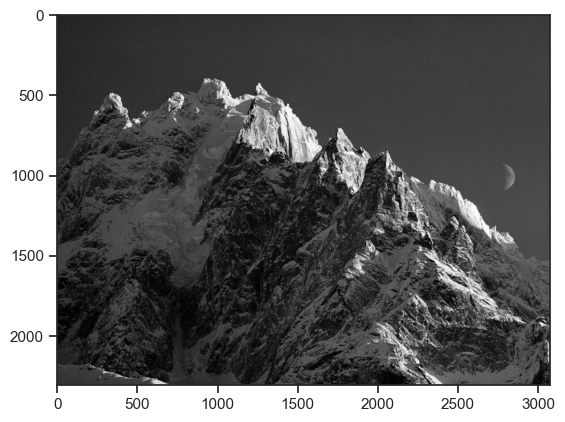

In [98]:
# Применение функции для большого изображения и вывод результата
with sns.axes_style("ticks"):
    plt.imshow(rgb_to_bw_intermediate(mountain_big_image, rgb_to_bw), cmap='gray')

In [99]:
# Вычисление среднего времени выполнения для среднего изображения и запись значения в список time
time[2] = %timeit -o rgb_to_bw_intermediate(mountain_big_image, rgb_to_bw)

68 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [100]:
# Заполнение словаря compute_time для случая промежуточного решения
fill_time("Промежуточное решение", time)

##### 4.3. Numpy

In [101]:
def rgb_to_bw_numpy(image, bw_filter):
    """
    Функция для преобразования изображения из цветного в ЧБ с помощью numpy
    :param image: Исходное изображение
    :param bw_filter: Фильтр для преобразования
    :return: ЧБ изображение
    """
    return np.dot(image, bw_filter)

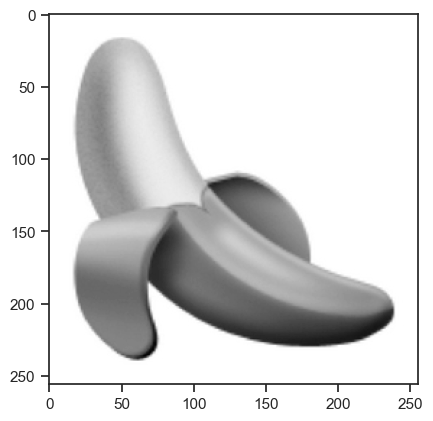

In [102]:
# Применение функции для маленького изображения и вывод результата
with sns.axes_style("ticks"):
    plt.imshow(rgb_to_bw_numpy(banana_small_image, rgb_to_bw), cmap='gray')

In [103]:
# Вычисление среднего времени выполнения для маленького изображения и запись значения в список time
time[0] = %timeit -o rgb_to_bw_numpy(banana_small_image, rgb_to_bw)

1.35 ms ± 93.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


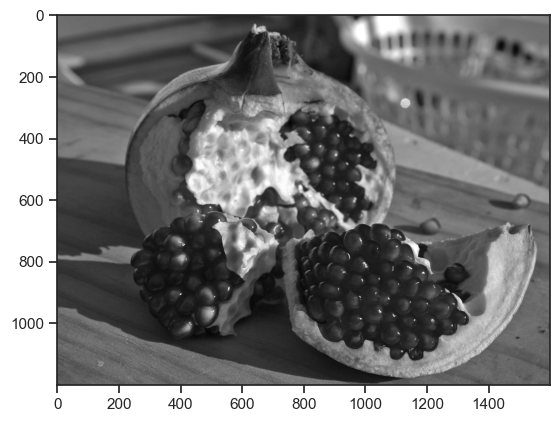

In [104]:
# Применение функции для среднего изображения и вывод результата
with sns.axes_style("ticks"):
    plt.imshow(rgb_to_bw_numpy(pomegranate_medium_image, rgb_to_bw), cmap='gray')

In [105]:
# Вычисление среднего времени выполнения для большого изображения и запись значения в список time
time[1] = %timeit -o rgb_to_bw_numpy(pomegranate_medium_image, rgb_to_bw)

38.4 ms ± 555 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


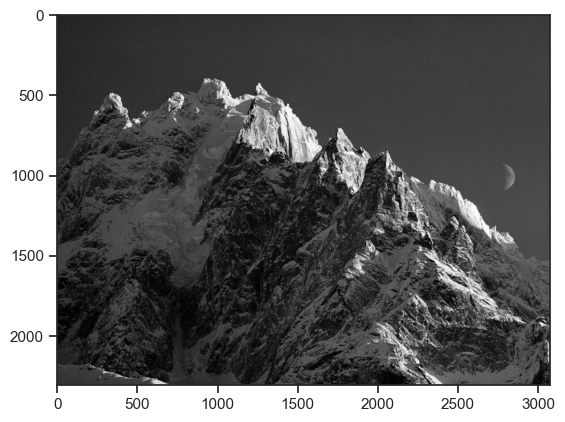

In [106]:
# Применение функции для большого изображения и вывод результата
with sns.axes_style("ticks"):
    plt.imshow(rgb_to_bw_numpy(mountain_big_image, rgb_to_bw), cmap='gray')

In [107]:
# Вычисление среднего времени выполнения для среднего изображения и запись значения в список time
time[2] = %timeit -o rgb_to_bw_numpy(mountain_big_image, rgb_to_bw)

142 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [108]:
# Заполнение словаря compute_time для случая векторизованного решения
fill_time("numpy", time)
compute_times

{'for-loop': [0.11649108142841473, 3.146636614276628, 11.399100228586965],
 'Промежуточное решение': [0.00019832453285593404,
  0.019157261428356703,
  0.06799829428533226],
 'numpy': [0.001346986328559329, 0.03837220857136085, 0.14174329000192562]}

##### Итог по задаче 4

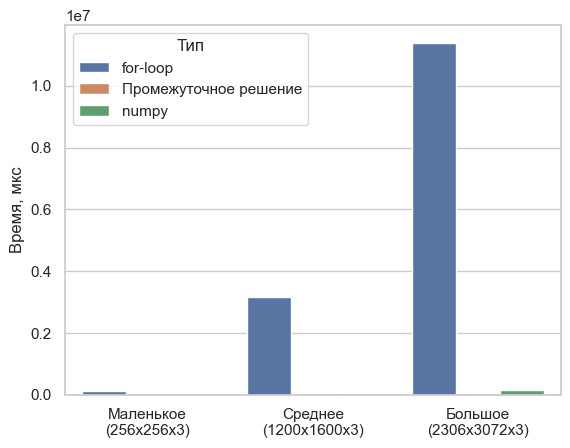

In [111]:
# Столбчатая диаграмма с временами работы разных вариантов кода
plot_time_bars(compute_times, ["Маленькое\n(256x256x3)", "Среднее\n(1200x1600x3)", "Большое\n(2306x3072x3)"])

Из графика видно, что вариант кода с циклом for занимает очень много времени для выполнения по сравнению с остальными вариантами. Для преобразования большого изображения требуется *целых 11 секунд*. Для анализа времён исполнения промежуточного варианта и варианта кода с numpy построим ещё одну столбчатую диаграмму, но уже без варианта с циклом.

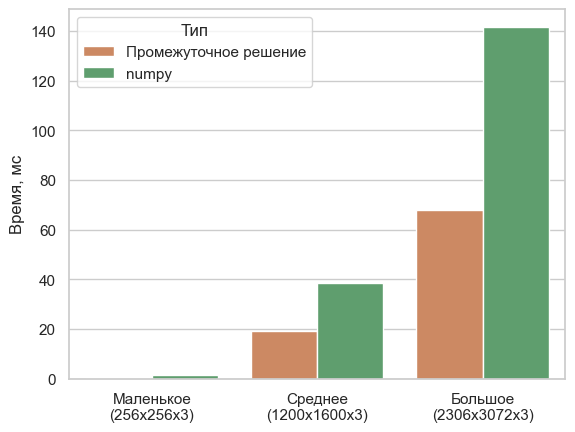

In [117]:
# Столбчатая диаграмма для промежуточного варианта и numpy
data_to_plot = pd.DataFrame(compute_times)
data_to_plot_melt = data_to_plot[["Промежуточное решение","numpy"]].melt(var_name="Тип", value_name="Время, c")
data_to_plot_melt["Время, мc"] = data_to_plot_melt["Время, c"]*1e3
sns.barplot(data=data_to_plot_melt, x=["Маленькое\n(256x256x3)", "Среднее\n(1200x1600x3)", "Большое\n(2306x3072x3)"]*2, y="Время, мc", 
            hue="Тип", palette=sns.color_palette("deep", 3)[1:])
plt.show()

В данном случае промежуточное решение показало себя лучше, чем полностью векторизованное решение.

#### 5. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.

Пример: x = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2]). Ответ: (np.array([2, 3, 5, 2]), np.array([3, 3, 1, 2])).

In [153]:
# Входные данные
x1 = np.array([2, 2, 2, 3, 3, 3, 5, 2, 2])

x2 = np.arange(1, 100)
x2 [10:20] = 1
x2 [80:85] = 27

x3 = np.arange(1, 1001)

##### 5.1. for-loop

In [289]:
def run_length_enc_loop(x):
    """
    Функция кодирования длин серий через цикл for
    :param x: Вектор X
    :return: Вектор с числами и вектор с количествами повторений
    """
    numbers_list = [x[0]] # Список с числами
    count_list = [1] # Список с количеством чисел
    count_index = 0 # Текущее значение индекса для count_list
    
    for item in x[1:]:
        if item != numbers_list[-1]:
            numbers_list.append(item)
            count_list.append(1)
            count_index += 1
        else:
            count_list[count_index] += 1
    
    return np.array(numbers_list), np.array(count_list)

In [290]:
# Выполнение функции для x1
run_length_enc_loop(x1)

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))

In [291]:
# Вычисление среднего времени выполнения для x1 и запись значения в список time
time[0] = %timeit -o run_length_enc_loop(x1)

2.18 µs ± 73.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [292]:
# Выполнение функции для x2
run_length_enc_loop(x2)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
        78, 79, 80, 27, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
        99]),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1]))

In [293]:
# Вычисление среднего времени выполнения для x2 и запись значения в список time
time[1] = %timeit -o run_length_enc_loop(x2)

17.2 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [294]:
# Выполнение функции для x3
run_length_enc_loop(x3)

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  146,  147,  148, 

In [295]:
# Вычисление среднего времени выполнения для x3 и запись значения в список time
time[2] = %timeit -o run_length_enc_loop(x3)

164 µs ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [296]:
# Заполнение словаря compute_time для случая for-loop
fill_time("for-loop", time)

##### 5.2. Промежуточное решение

In [284]:
def run_length_enc_intermediate(x):
    """
    Функция кодирования длин серий (промежуточный вариант)
    :param x: Вектор X
    :return: Вектор с числами и вектор с количествами повторений
    """
    numbers_list = [] # Список с числами
    count_list = [] # Список с количеством чисел
    changes_list = [0] + list(np.flatnonzero(np.diff(x)) + 1) + [len(x)] # Список с индексами начала новых последовательностей и длиной исходного вектора
    
    for i in range(len(changes_list) - 1):
        numbers_list.append(x[changes_list[i]])
        count_list.append(changes_list[i + 1] - changes_list[i])
        
    return np.array(numbers_list), np.array(count_list, dtype=int)

In [297]:
# Выполнение функции для x1
run_length_enc_intermediate(x1)

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))

In [298]:
# Вычисление среднего времени выполнения для x1 и запись значения в список time
time[0] = %timeit -o run_length_enc_intermediate(x1)

6.31 µs ± 557 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [299]:
# Выполнение функции для x2
run_length_enc_intermediate(x2)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
        78, 79, 80, 27, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
        99]),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1]))

In [300]:
# Вычисление среднего времени выполнения для x2 и запись значения в список time
time[1] = %timeit -o run_length_enc_intermediate(x2)

28.4 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [301]:
# Выполнение функции для x3
run_length_enc_intermediate(x3)

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  146,  147,  148, 

In [302]:
# Вычисление среднего времени выполнения для x3 и запись значения в список time
time[2] = %timeit -o run_length_enc_intermediate(x3)

324 µs ± 67.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [303]:
# Заполнение словаря compute_time для случая промежуточного решения
fill_time("Промежуточное решение", time)

##### 5.3. Numpy

In [304]:
def run_length_enc_numpy(x):
    """
    Функция кодирования длин серий через numpy
    :param x: Вектор X
    :return: Вектор с числами и вектор с количествами повторений
    """
    changes_indexes = np.flatnonzero(np.diff(x)) + 1 # Номера индексов, в которых элемент поменялся (начало новой серии)
    values = np.concatenate((x[:1], x[changes_indexes])) # Вектор с числами
    counts = np.concatenate((changes_indexes[:1], np.diff(changes_indexes), len(x) - changes_indexes[-1:]), dtype=int) # Вектор с количеством повторений чисел
    return values, counts

In [305]:
# Выполнение функции для x1
run_length_enc_numpy(x1)

(array([2, 3, 5, 2]), array([3, 3, 1, 2]))

In [306]:
# Вычисление среднего времени выполнения для x1 и запись значения в список time
time[0] = %timeit -o run_length_enc_numpy(x1)

9.62 µs ± 928 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [307]:
# Выполнение функции для x2
run_length_enc_numpy(x2)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
        78, 79, 80, 27, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
        99]),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1]))

In [308]:
# Вычисление среднего времени выполнения для x2 и запись значения в список time
time[1] = %timeit -o run_length_enc_numpy(x2)

10.5 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [309]:
# Выполнение функции для x3
run_length_enc_numpy(x3)

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  146,  147,  148, 

In [310]:
# Вычисление среднего времени выполнения для x3 и запись значения в список time
time[2] = %timeit -o run_length_enc_numpy(x3)

12.8 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [311]:
# Заполнение словаря compute_time для случая векторизованного решения
fill_time("numpy", time)
compute_times

{'for-loop': [2.1813614290606765e-06,
  1.7224843285678486e-05,
  0.0001644753342860245],
 'Промежуточное решение': [6.305983428277873e-06,
  2.8362631426924575e-05,
  0.00032447487145795354],
 'numpy': [9.618628142800715e-06,
  1.0471286999693674e-05,
  1.2771283285526027e-05]}

##### Итог по задаче 5

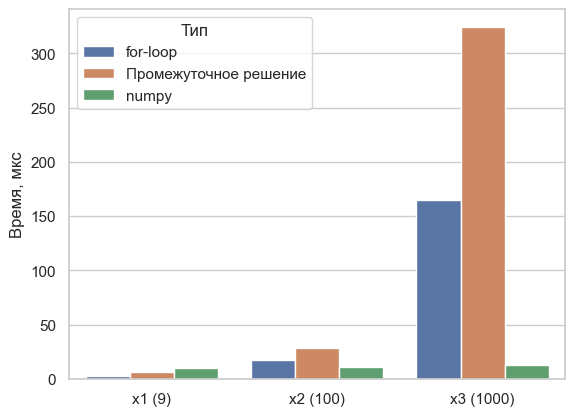

In [312]:
# Столбчатая диаграмма с временами работы разных вариантов кода
plot_time_bars(compute_times, ["x1 (9)", "x2 (100)", "x3 (1000)"])

Полностью векторизованный вариант решения показал себя лучше остальных, уступая остальным вариантам только при очень малом размере входного вектора. Также стоит отметить, что промежуточный вариант в данной задаче показывает себя хуже всех

### Общий итог по задачам

По итогу решения пяти задач векторизованный вариант кода тратил гораздо меньше времени на исполнение во всех задачах, кроме одной, где лучшим оказался промежуточный вариант. Особенно разница во времени заметна, если размер входных данных большой. Также стоит отметить, что векторизованный вариант кода может уступать варианту кода с циклом на очень маленьких по размеру входных данных, однако в реальных задачах входные данные подобного размера практически не встречаются. Поэтому для манипуляций с данными следует использовать векторизованные варианты обработки, в частности те, что представлены в библиотеке numpy.